In [1]:
import pandas as pd

In [70]:
cookies = pd.read_csv('cookies.csv')

In [4]:
cookies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5198 entries, 0 to 5197
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sugar to flour ratio  5198 non-null   float64
 1   sugar index           5193 non-null   float64
 2   bake temp             5198 non-null   int64  
 3   chill time            5198 non-null   float64
 4   calories              5198 non-null   float64
 5   density               5198 non-null   float64
 6   pH                    5198 non-null   float64
 7   grams baking soda     5198 non-null   float64
 8   bake time             5188 non-null   float64
 9   quality               5198 non-null   int64  
 10  butter type           5198 non-null   object 
 11  weight                5198 non-null   float64
 12  diameter              5198 non-null   int64  
 13  mixins                5196 non-null   object 
 14  crunch factor         5198 non-null   float64
 15  aesthetic appeal     

In [12]:
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

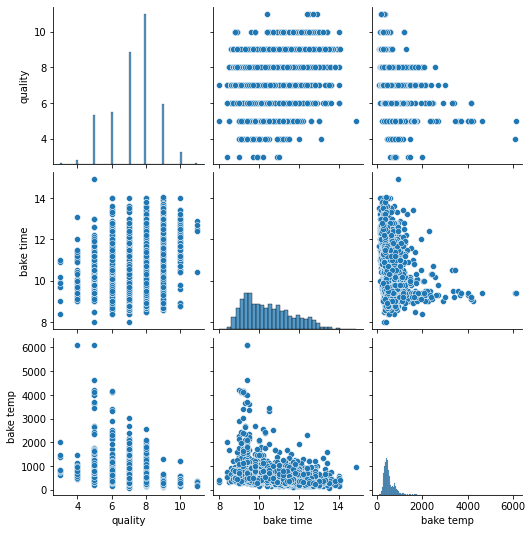

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.pairplot(cookies[['quality', 'bake time', 'bake temp']])

In [20]:
num_cols = cookies.select_dtypes(include=["int64", "float64"]).columns

for column in num_cols:
    print(column, '-->', cookies['quality'].corr(cookies[column]))

sugar to flour ratio --> 0.18213460597745243
sugar index --> 0.2206535224433542
bake temp --> -0.47050370901242444
chill time --> 0.364653035043133
calories --> 0.4398363987447589
density --> -0.021995308762374956
pH --> -0.11472101703648845
grams baking soda --> -0.30534038308979605
bake time --> 0.3153070710526109
quality --> 1.0
weight --> -0.3282994017266426
diameter --> nan
crunch factor --> 0.00726205044005011
aesthetic appeal --> 0.00015142266125476968


In [22]:
cookies['butter type'].value_counts()

melted    3920
cubed     1278
Name: butter type, dtype: int64

## mixins

In [67]:
cookies['mixins'].fillna(value = ' ', axis=0, inplace=True)
cookies[cookies['mixins'].isnull()]

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,weight,diameter,mixins,crunch factor,aesthetic appeal,chocolate,raisins,oats,nuts,peanut butter


In [82]:
cookies['chocolate'] = 0
cookies['raisins'] = 0
cookies['oats'] = 0
cookies['nuts'] = 0
cookies['peanut butter'] = 0

In [85]:

cookies.head()

,sugar to flour ratio,sugar index,bake temp,chill time,calories,density,pH,grams baking soda,bake time,quality,...,weight,diameter,mixins,crunch factor,aesthetic appeal,chocolate,raisins,oats,nuts,peanut butter
0,0.25,9.5,300,15.0,136.0,0.99367,8.10,0.44,12.1,8,...,15.2,7,raisins,1.30,3,0,1,0,0,0
1,0.23,3.3,520,34.0,113.0,0.99429,8.16,0.48,8.4,7,...,12.4,7,raisins,1.71,3,0,1,0,0,0
2,0.18,1.9,360,33.0,106.0,0.98746,8.21,0.83,14.0,9,...,9.4,7,"nuts, chocolate",1.78,3,1,0,0,1,0
3,0.18,10.5,490,41.0,124.0,0.99630,8.14,0.35,10.5,7,...,12.2,7,chocolate,1.59,3,1,0,0,0,0
4,0.24,2.4,770,6.0,33.0,0.99740,8.09,0.57,9.4,5,...,19.8,7,"nuts, oats, chocolate",1.30,3,1,0,1,1,0


In [76]:
[x.strip() for x in cookies.loc[54, 'mixins'].split(',')]

['chocolate', 'oats']

In [86]:
mixins = ['chocolate', 'raisins', 'oats', 'nuts', 'peanut butter']
cookies['mixins'].fillna(value = ' ', axis=0, inplace=True)
for mix in mixins:
    for i in range(len(cookies)):
        if mix in [x.strip() for x in cookies.loc[i, 'mixins'].split(',')]:
            cookies.loc[i, mix] = 1

## aesthetic appeal

In [24]:
cookies['aesthetic appeal'].value_counts()


3    5195
4       3
Name: aesthetic appeal, dtype: int64

## weight

In [26]:
cookies['weight'].describe()

count    5198.000000
mean       14.381935
std         3.023740
min       -99.000000
25%        12.800000
50%        14.000000
75%        15.400000
max        31.800000
Name: weight, dtype: float64

In [35]:
cookies['weight'].unique()

array([ 15.2,  12.4,   9.4,  12.2,  19.8,  13.2,  14.2,  13.8,  12.6,
        12.8,  13. ,  14. ,  12. ,  14.6,  15.6,  13.4,  16.8,  14.8,
        13.6,  16. ,  11. ,  18.6,  10.6,  18.2,  15.8,  17.2,  14.3,
        10.4,  11.8,  11.6,  15.4,  21.6,  20.2,  14.4,  12.3,  23.8,
        11.2,  11.4,  15. ,  19.6,  17.4,  16.4,  19.2,  10.8,  18. ,
        26. ,  16.6,  16.2,  19. ,  10. ,  21.4,  20.4,  17. ,  31.2,
        17.8,  22.6,   9.8,  23. ,  18.8,  26.6,  20.8,  26.4,  10.2,
        22.2,  23.4,  18.4,  17.6,  28.4,  24.6,  20.6,  25. ,  24.2,
        22.8,  24. ,  23.2,  24.4,  26.8,  22.4,  19.4,  23.6,  27.4,
        28. ,  22. ,  21.8,  25.2,  25.8,  20. ,  21.2,  21. , -99. ,
        25.6,  31. ,   9. ,  24.8,  25.4,   9.6,   8.8,  30. ,  12.9,
         9.2,  31.8,   7.6,   7.8,   8.4,  28.6])

In [34]:
# Remove -99 value

## diameter

In [37]:
cookies['diameter'].unique()

array([7])

In [ ]:
# All equal to 7

## bake time

In [38]:
cookies['bake time'].describe()

count    5188.000000
mean       10.494758
std         1.194584
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: bake time, dtype: float64

In [39]:
cookies[cookies['bake time'].isnull()]['quality']

13       7
173      8
484     10
816      7
1562     8
1867     7
1933     7
2215     9
2910     6
3746    10
Name: quality, dtype: int64

In [ ]:
# seems that this cookies have been cooked so we should put the mean or drop that rows.

## crunch factor

<AxesSubplot:ylabel='Frequency'>

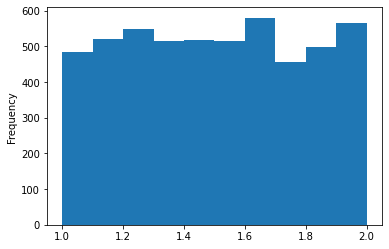

In [42]:
cookies['crunch factor'].plot.hist()

In [ ]:
df_cookies = cookies[['valence', 'love', 'feel', 'life', 'man', 'woman', 'boy', 'girl', 'lady', 'family',
               'world', 'never', 'end', 'baby', 'happy', 'sad']]

corr = df_words.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig14, ax14 = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})